<a href="https://colab.research.google.com/github/DesiKeki/ML_Tutorial/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=ada25481507317922949619ad462b7ed90a9d857a5fff6a39c4e14bd61a2e125
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


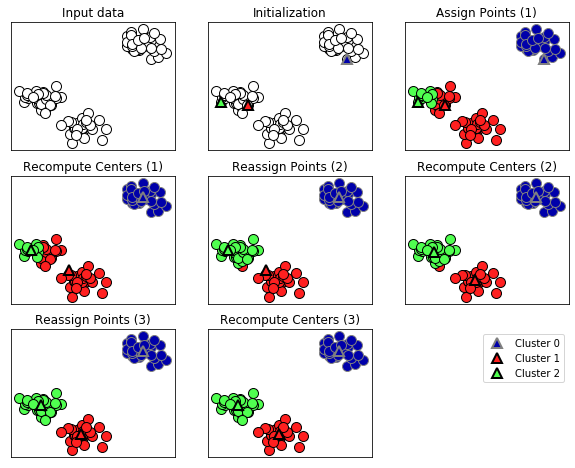

In [0]:
mglearn.plots.plot_kmeans_algorithm()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


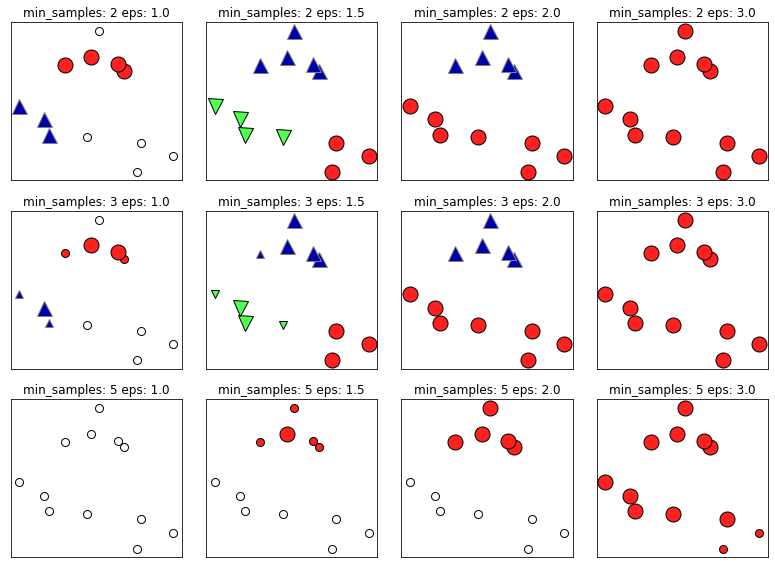

In [0]:
mglearn.plots.plot_dbscan()

In [0]:
# generate some random cluster data
X, y = make_blobs(n_samples=[6, 10, 39,  5,  1,  8,  2, 11,  1, 
                             18,  6,  1,  2,  4,  6,  6,  2,  1,  
                             3,  2,  3,  1,  8,  3,  1,  9,  5,  1], n_features=1685, shuffle=True, random_state=170)
X.shape, y.shape

((165, 1685), (165,))

In [0]:
print(X)

[[ -8.99962578  -2.19466667  -2.79918766 ...   7.30398321   3.2427546
   -8.71843271]
 [ -8.82445098  -1.27675163  -3.76263781 ...   5.47359944   3.91142082
   -8.7290577 ]
 [  1.59735364   7.82530086  -6.17583863 ...   4.75010213  -0.25432661
   -2.97615849]
 ...
 [ -8.78316303  -3.48461849  -2.33743198 ...   5.74778222   1.4339645
   -7.85192111]
 [  6.63319404   4.6004443   -3.00584031 ...  -7.49630057  -8.36250989
    6.4527511 ]
 [-10.14926296  -2.43629411  -0.63577032 ...   6.38152064   1.96541745
   -6.64509365]]


**Dimenssionality Reduction (PCA)**

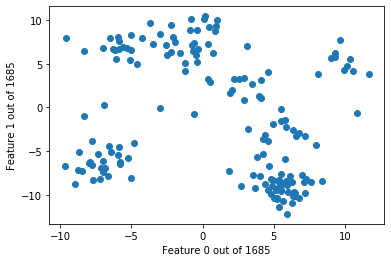

In [0]:
#plot only two features
plt.scatter(X[:, 5], X[:, 51])
plt.xlabel("Feature 0 out of 1685")
plt.ylabel("Feature 1 out of 1685")
plt.show()

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("Variance: ", pca.explained_variance_ratio_)


original shape:    (165, 1685)
transformed shape: (165, 2)
Variance:  [0.20383352 0.10989083]


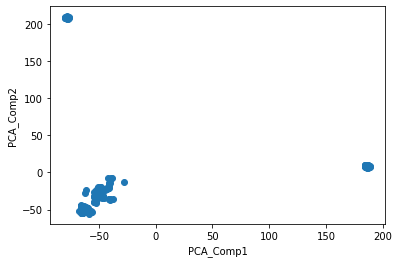

In [0]:
#plot PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PCA_Comp1")
plt.ylabel("PCA_Comp2")
plt.show()

**Apply K-Means Clustering**

In [0]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=28)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Text(0, 0.5, 'Feature 1')

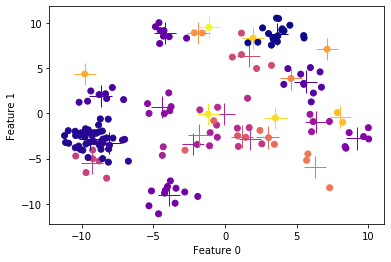

In [0]:
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='+', 
            c=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], 
            s=500, 
            linewidth=1,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Apply DBSCAN Clustering**

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Expecting to get 28 clusters
dbscan = DBSCAN(eps=60, min_samples = 2)
#clusters = dbscan.fit_predict(X_scaled)
clusters = dbscan.fit_predict(X)
print(clusters)

[ 0  0  1  2  3  4  5  1  6  7  0  8  9 10  0 11  1 10 12 13  0 14  0 15
  0 -1  3 12 16  1 17  6 12 12  1  0  0  8  6 13 -1 14  8  9 14  7 10 12
  9 15  0  5 17  0  0  0  3  0 17  6  1  0 18 19  9 16 12  5 14  0  8 16
  9 -1 14 17  0  8 20  5 15 18 13  1  7  7  7 12 15  6 -1 -1  3  1 13  1
  0  0 20 13 13 13  0  2  0  0 13 -1  1  1 -1 13  6  7  0  0  0 17  0  9
  1 16  4 19 15  1  6  0  1 15  6  0 15 13  1  5  0 17  8 12  9  1 16  0
  9  1 13 15  0  0  9  0  6 19  0  2 11  0  0 16  0  1  0  6  0]


Text(0, 0.5, 'Feature 1')

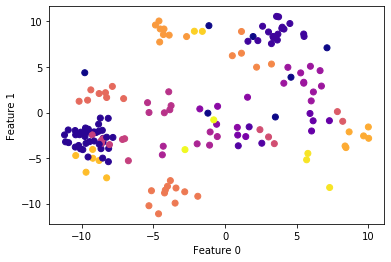

In [0]:
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Measure Performance**

In [0]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("K-Means performance ARI =", adjusted_rand_score(y, y_pred))

#DBSCAN performance:
print("DBSCAN performance ARI =", adjusted_rand_score(y, clusters))


K-Means performance ARI = 1.0
DBSCAN performance ARI = 0.9903658651953529


**Liked the course and the lab?**

Show me some love on internet:

Give Yugasa a 5 star rating at: https://bit.ly/39TJXx5

Follow Yugasa on Linkedin: https://www.linkedin.com/company/yugasa-software-labs

Like and follow Yugasa on FB: https://www.facebook.com/yugasasoftwarelabs